In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

In [8]:
X.shape

(1797, 64)

In [9]:
from sklearn.cross_validation import cross_val_score

In [13]:
from sklearn.tree import DecisionTreeClassifier

cross_val_score(DecisionTreeClassifier(), X, y, cv=10, n_jobs=-1).mean()

0.83199073007723379

In [16]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean()

0.92100690427930942

In [37]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cross_val_score(clf1, X, y, cv=10, n_jobs=-1).mean()

0.9309674760893708

In [26]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1]))),
                        n_estimators=100)
cross_val_score(clf2, X, y, cv=10, n_jobs=-1).mean()

0.95396139249038003

In [28]:
from sklearn.ensemble import RandomForestClassifier

scores = []
n_trees = range(10, 200, 10)
for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())

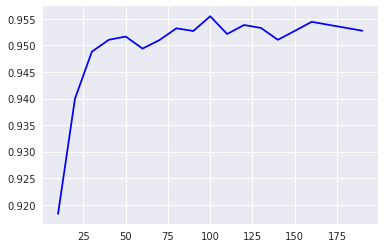

In [29]:
plt.plot(n_trees, scores, 'b-')

In [30]:
from sklearn.ensemble import RandomForestClassifier

scores = []
n_features = range(5, 60, 5)
for n in n_features:
    clf = RandomForestClassifier(n_estimators=50, max_features=n)
    scores.append(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())

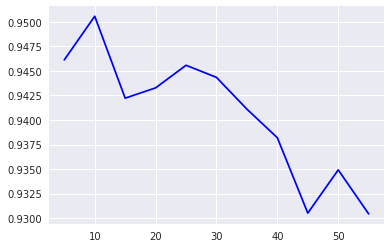

In [31]:
plt.plot(n_features, scores, 'b-')

In [33]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5)
print(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())

clf = RandomForestClassifier(n_estimators=50)
print(cross_val_score(clf, X, y, cv=10, n_jobs=-1).mean())

0.904807321152
0.951684400878


In [ ]:
2 3 4 7